### An analysis of paleo-present climate data

##### Project 2 for Programming for Data Analysis. Semester 2, HDip in Data Analytics at ATU, Galway 2023/24 
##### Author: Shane Keenan 


<img src="https://th.bing.com/th/id/R.ae6f8e0c3318eec126af7f75d9cd9a4b?rik=ZhfQPn9RJqMPdQ&pid=ImgRaw&r=" alt="Alt text" width="900"/>


---


### Contents 

1. Introduction - Climate change 
2. Objective of project - project statement
3. Paleoclimatology - how is data collected about the historic climate of the planet ?  
4. Data sets for this work - Temperature, CO2 and Methane - describe, import and visualise. 
5. Reprocessing for Exploratory data analysis - correlation coefficients.   


6. Train model using split data set and Linear regression  
7. Use model to simulate data for test 
8. Evaluate 


## 1. Introduction - Climate change 

***

Climate is a very hot topic at the moment and extremely political. Which makes it 


<img src="https://www.climate.gov/sites/default/files/styles/full_width_620_original_image/public/2023-08/ClimateDashboard-atmospheric-carbon-dioxide-graph-20230825-1400px.png?itok=S4XoakO7" alt="Alt text" width="500"/>



https://www.climate.gov/sites/default/files/styles/full_width_620_original_image/public/2023-08/ClimateDashboard-atmospheric-carbon-dioxide-graph-20230825-1400px.png?itok=S4XoakO7

https://wattsupwiththat.com/2022/01/16/how-much-manmade-co2-is-in-the-atmosphere-really/






<img src="https://scx2.b-cdn.net/gfx/news/hires/2020/highfidelity.jpg" alt="Alt text" width="900"/>





### References

[1] 

[2]
 
[3]









## 2. Project statement (from lecturer Brain McGinley)

***

- Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
- Examine Irish context:
o Climate change signals: (see Maynooth study: The emergence of a climate change 
signal in long-term Irish meteorological observations - ScienceDirect)
- Fuse and analyse data from various data sources and format fused data set as a pandas 
dataframe and export to csv and json formats
- For all of the above variables, analyse the data, the trends and the relationships between 
them (temporal leads/lags/frequency analysis).
- Predict global temperature anomaly over next few decades (synthesise data) and compare to 
published climate models if atmospheric CO2 trends continue
- Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)



## Objective 



https://www.ncei.noaa.gov/news/what-are-proxy-data

https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide




Import revelvent python packages 

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.dates as mdates 
from matplotlib.ticker import MultipleLocator
import math as m
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.interpolate import CubicSpline

## 4. Data sets - Temperature, Carbon dioxide (CO2) and Methane (CH4) 

Describe, import and visualise. 
***

### 4.1 CO2 data from Luthi et al Nature paper

Lüthi, D., Le Floch, M., Bereiter, B. et al. High-resolution carbon dioxide concentration record 650,000–800,000 years before present. Nature 453, 379–382 (2008). https://doi.org/10.1038/nature06949


atmospheric carbon dioxide concentrations can be determined by measuring the composition of air trapped in ice cores from Antarctica.

BP - Before Present 

How do they date the samples? what does "EDC3_gas_a" mean? 


METHODS SUMMARY

The analytical methods for routine CO2 measurements used at the University of
Bern and at LGGE in Grenoble are based on dry extraction techniques followed
by laser absorption spectroscopy and gas chromatography, respectively. In Bern,
four to six samples (23 3 23 3 16 mm; 8 g) from each depth level (every 550 mm)
in the ice core are measured in random order (two on the same day; the following
two after all depth intervals have been measured twice). The samples are crushed
by a cooled needle cracker under vacuum conditions. The sample container is
connected to a cold trap for several minutes to release the air from the clathrates.
Afterwards, the air is expanded to a measuring cell, where a laser is tuned six
times over the absorption line of a vibration–rotation transition of the CO2
molecule. The calibration is done using a CO2 in air standard gas
(251.65 p.p.m.v.) scaled on the World Meteorological Organization mole fraction scale.
In Grenoble, on every depth level one to three samples of about 40 g of ice are
crushed under vacuum conditions. About 20 min later, the extracted gas is
expanded in the sample loop of the gas chromatograph and analysed.
Depending on the amount of the extracted air, three to five successive analyses
are done. To avoid the possible influence of the water vapour injected with the
gas, the CO2 ratio is calculated as the ratio between the CO2 peak and the air
(O2 1 N2) peak. The calibration is done using an Air Liquide standard scaled on
three CSIRO standards (260.3 p.p.m.v., 321.1 p.p.m.v. and 172.8 p.p.m.v.).

In [2]:
# read in excel spredsheet 
# https://datatofish.com/read_excel/
# https://www.geeksforgeeks.org/how-to-import-an-excel-file-into-python-using-pandas/
# https://www.datacamp.com/tutorial/python-excel-tutorial
# Syntax: pandas.read_excel(io, sheet_name=0, header=0, names=None,….)

# header data for file
# Dome C (611-800 kyr BP)				
# Lüthi et al. (sub)
# University of Bern				LGGE in Grenoble

# how to use relative path 
#https://stackoverflow.com/questions/1270951/how-to-refer-to-relative-paths-of-resources-when-working-with-a-code-repository
current_directory = os.getcwd()
# relative path from the notebook to the Excel file
relative_path = "data\\project2\\41586_2008_BFnature06949_MOESM31_ESM.xls"
# Join the two 
file_path = os.path.join(current_directory, relative_path)
df = pd.read_excel(file_path, sheet_name="1.  new CO2 data", header = 6)

In [3]:
df.head(2)

,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1
0,3026.58,611269,257.8,2.1,3061.71,667435.0,178.5
1,3030.97,616164,252.6,0.6,3063.98,670124.0,189.0


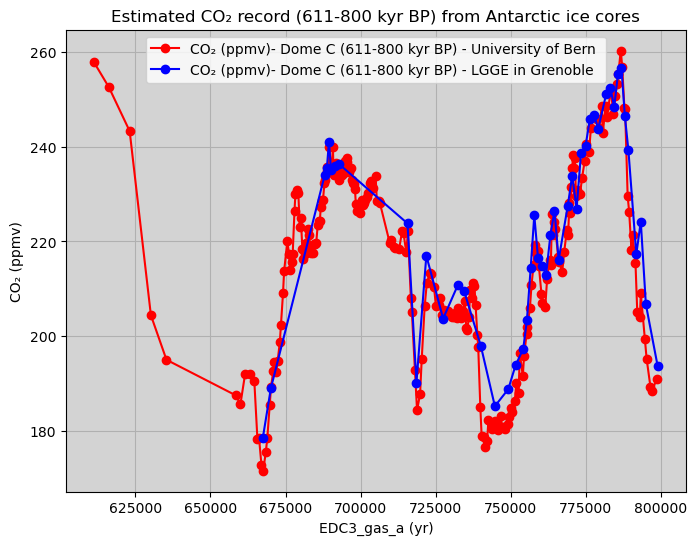

In [4]:
# subscript: https://www.geeksforgeeks.org/how-to-print-superscript-and-subscript-in-python/
# invert x-axis: https://www.delftstack.com/howto/matplotlib/how-to-revert-axes-in-matplotlib/#:~:text=To%20revert%20X-axis%2C%20we%20use%20matplotlib.axes.Axes.invert_xaxis,and%20to%20invert%20Y-axis%20we%20use%20matplotlib.axes.Axes.invert_yaxis.
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df['EDC3_gas_a (yr)'], df['CO2 (ppmv)'], color='red', label='CO\u2082 (ppmv)- Dome C (611-800 kyr BP) - University of Bern ', marker = 'o')
plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='CO\u2082 (ppmv)- Dome C (611-800 kyr BP) - LGGE in Grenoble',marker = 'o')
plt.xlabel('EDC3_gas_a (yr)')
plt.ylabel('CO\u2082 (ppmv)')
plt.title('Estimated CO\u2082 record (611-800 kyr BP) from Antarctic ice cores')
plt.legend(loc="upper center")
plt.grid(True)
plt.gca().set_facecolor('lightgray')

Import the second tab of data in the excel spreadsheet. This contains results from multiple Antarctic ice core samples - including the data from the first tab (plotted previously)

In [5]:
df2 = pd.read_excel(file_path, sheet_name="2.  Vostok-TD-Dome C", header = 6)
df2.head(1)

,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1,Depth (m).2,tentatively synchronized on EDC3_gas_a (yr),CO2 (ppmv).2,...,Depth (m).4,EDC3_gas_a (yr).3,CO2 (ppmv).4,Depth (m).5,EDC3_gas_a (yr).4,CO2 (ppmv).5,sigma (ppmv).3,Depth (m).6,EDC3_gas_a (yr).5,CO2 (ppmv).6
0,102.83,137.0,280.4,1.8,149.1,2690,284.7,380.82,18906.0,190.5,...,2700.77,392544.0,259.5,3026.58,611269.0,257.8,2.1,3061.71,667435.0,178.5


Plot each data set individually on the same plot. 

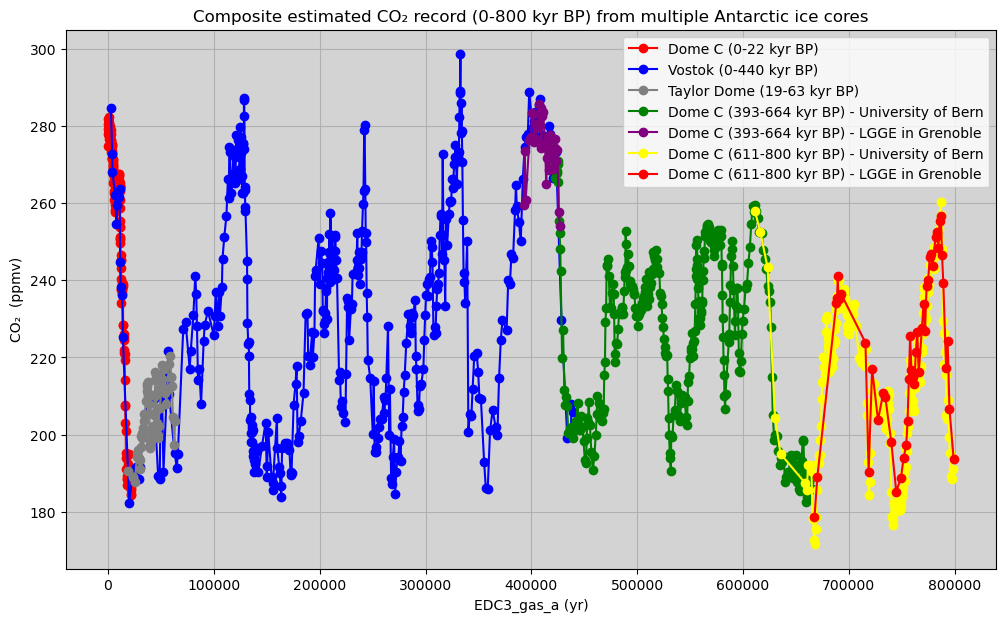

In [6]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(df2['EDC3_gas_a (yr)'], df2['CO2 (ppmv)'], color='red', label='Dome C (0-22 kyr BP)', marker = 'o')
plt.plot(df2['EDC3_gas_a (yr).1'], df2['CO2 (ppmv).1'], color='Blue', label='Vostok (0-440 kyr BP)',marker = 'o')
plt.plot(df2['tentatively synchronized on EDC3_gas_a (yr)'], df2['CO2 (ppmv).2'], color='grey', label='Taylor Dome (19-63 kyr BP)',marker = 'o')
plt.plot(df2['EDC3_gas_a (yr).2'], df2['CO2 (ppmv).3'], color='green', label='Dome C (393-664 kyr BP) - University of Bern',marker = 'o')
plt.plot(df2['EDC3_gas_a (yr).3'], df2['CO2 (ppmv).4'], color='purple', label='Dome C (393-664 kyr BP) - LGGE in Grenoble',marker = 'o')
plt.plot(df2['EDC3_gas_a (yr).4'], df2['CO2 (ppmv).5'], color='yellow', label='Dome C (611-800 kyr BP) - University of Bern',marker = 'o')
plt.plot(df2['EDC3_gas_a (yr).5'], df2['CO2 (ppmv).6'], color='red', label='Dome C (611-800 kyr BP) - LGGE in Grenoble',marker = 'o')
plt.xlabel('EDC3_gas_a (yr)')
plt.ylabel('CO\u2082  (ppmv)')
plt.title('Composite estimated CO\u2082 record (0-800 kyr BP) from multiple Antarctic ice cores')
plt.legend(loc="upper right")
plt.gca().set_facecolor('lightgray')
plt.grid(True)

Import the composite data set from tab 3 of excel spreadsheet

In [7]:
# Header 
# Composite CO2 record (0-800 kyr BP)	
# 0-22 kyr BP:	Dome C (Monnin et al. 2001) measured at University of Bern
# 22-393 kyr BP:	Vostok (Petit et al. 1999; Pepin et al. 2001; Raynaud et al. 2005) measured at LGGE in Grenoble
# 393-416 kyr BP:	Dome C (Siegenthaler et al. 2005) measured at LGGE in Grenoble
# 416-664 kyr BP:	Dome C (Siegenthaler et al. 2005)  measured at University of Bern
# 664-800 kyr BP:	Dome C (Luethi et al. (sub)) measured at University of Bern
df_COM = pd.read_excel(file_path, sheet_name="3.  Composite CO2", header = 6)
df_COM.head(2)

,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9


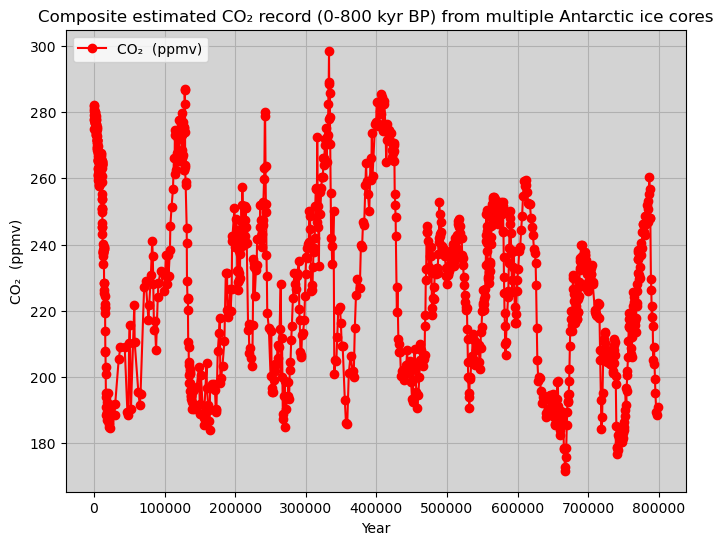

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='red', label='CO\u2082  (ppmv)', marker = 'o')
#plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='House Prices (from price index)',marker = 'o')
plt.xlabel('Year')
plt.ylabel('CO\u2082  (ppmv)')
plt.title('Composite estimated CO\u2082 record (0-800 kyr BP) from multiple Antarctic ice cores')
plt.legend(loc="upper left")
plt.gca().set_facecolor('lightgray')
plt.grid(True)

### Import CO2 data from IPCC Report



Bereiter, B., Eggleston, S., Schmitt, J., Nehrbass-Ahles, C., Stocker, T. F., Fischer, H., Kipfstuhl, S., and Chappellaz, J. (2015), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophys. Res. Lett., 42, 542–549, doi:10.1002/2014GL061957.




[4]  https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter01_SM.pdf

In [9]:
# Composite CO2 record (0-800 kyr BP)	
# -51-1800 yr BP:'	Law Dome (Rubino et al., 2013)
# 1.8-2 kyr BP:	Law Dome (MacFarling Meure et al., 2006)
# 2-11 kyr BP:	Dome C (Monnin et al., 2001 + 2004)
# 11-22 kyr BP:	WAIS (Marcott et al., 2014) minus 4 ppmv (see text)
# 22-40 kyr BP:	Siple Dome (Ahn et al., 2014)
# 40-60 kyr BP:	TALDICE (Bereiter et al., 2012)
# 60-115 kyr BP:	EDML (Bereiter et al., 2012)
# 105-155 kyr BP:	Dome C Sublimation (Schneider et al., 2013)
# 155-393 kyr BP:	Vostok (Petit et al., 1999)
# 393-611 kyr BP:	Dome C (Siegenthaler et al., 2005)
# 612-800 kyr BP:	Dome C (Bereiter et al., 2014)
# Gasage: AICC2012 (Bazin et al., 2013) except for Law Dome, WAIS and Siple Dome (see text for more details).	
# Sigma: Where no individual sigma is given, we use average for system/record.	
relative_path2 = "data\\project2\\grl52461-sup-0003-supplementary.xls"
# Join the two 
file_path = os.path.join(current_directory, relative_path2)
df_IPCC = pd.read_excel(file_path, sheet_name="CO2 Composite", header = 14)
df_IPCC.describe()
df_IPCC.isnull().sum()

Gasage (yr BP)           0
CO2 (ppmv)               0
sigma mean CO2 (ppmv)    0
dtype: int64

There was something strange going on with the column headings in this data set. Kept causing error when plotting. I think there was extra characters. Use .str.strip() to remove. 

In [10]:
df_IPCC.columns = df_IPCC.columns.str.strip()
df_IPCC.columns

Index(['Gasage (yr BP)', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')

Plot the IPCC data set 

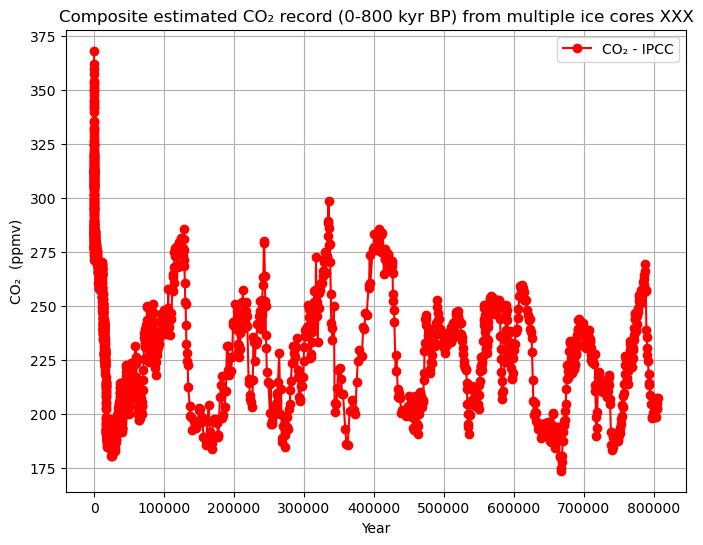

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], color='red', label='CO\u2082 - IPCC', marker = 'o')
#plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='House Prices (from price index)',marker = 'o')
plt.xlabel('Year')
plt.ylabel('CO\u2082  (ppmv)')
plt.title('Composite estimated CO\u2082 record (0-800 kyr BP) from multiple ice cores XXX')
plt.legend(loc="upper right")
plt.grid(True)

Compare the IPCC data set with the data presented in Luthi et al Nature paper. 

IPCC data set contains - 
Blurb from data set README file 

Composite of atmospheric CO2 records from Antarctic ice cores

Reference:
Bereiter et al. (2014), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophysical Research Letters, doi: 10.1002/2014GL061957.

This new version of CO2 composite replaces the old version of Lüthi et al. (2008), which contains the analytical bias described in the article mentioned above and lower quality data and many other sections.
For details about the improvements relative to the previous version see supplementary information of the main article.
For detailed references of all records collected in this file also refer to the supplemetary information of the main article.
For latest anthropogenic data refer to NOAA/Mauna Loa record.
Age unit is in years before present (yr BP) whereas present refers to 1950.

Note, not all records shown in sheet "all records" are part of the composite. 
If millennial scale or smaller details of the composite are studied, we recommend to look into all records available for that period and not only in the composite.


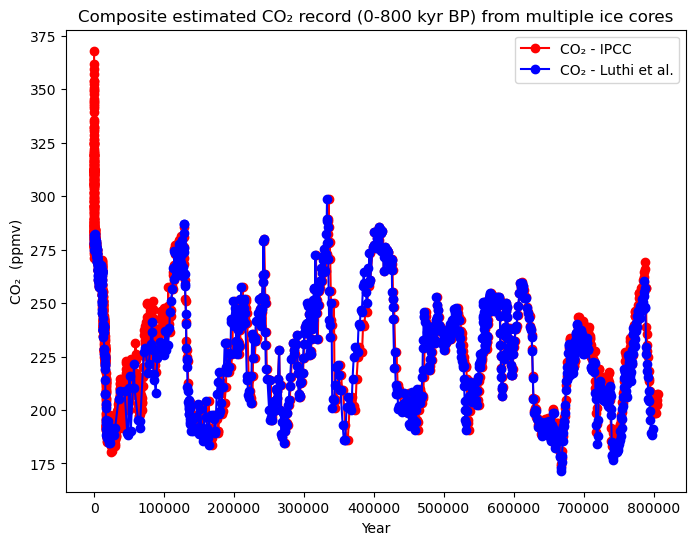

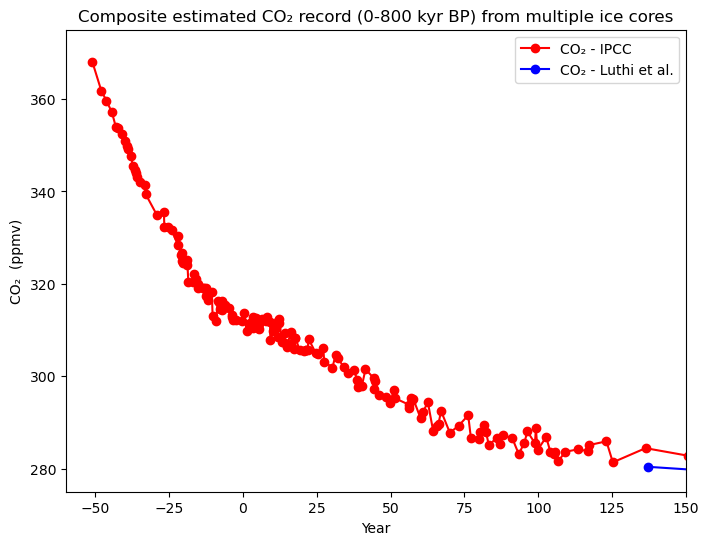

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], color='red', label='CO\u2082 - IPCC', marker = 'o')
plt.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='CO\u2082 - Luthi et al.', marker = 'o')
#plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='House Prices (from price index)',marker = 'o')
plt.xlabel('Year')
plt.ylabel('CO\u2082  (ppmv)')
plt.title('Composite estimated CO\u2082 record (0-800 kyr BP) from multiple ice cores')
plt.legend(loc="upper right")
plt.show()
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], color='red', label='CO\u2082 - IPCC', marker = 'o')
plt.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='CO\u2082 - Luthi et al.', marker = 'o')
#plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='House Prices (from price index)',marker = 'o')
plt.xlabel('Year')
plt.ylabel('CO\u2082  (ppmv)')
plt.title('Composite estimated CO\u2082 record (0-800 kyr BP) from multiple ice cores')
plt.legend(loc="upper right")
plt.xlim(- 60 , 150)
plt.ylim(275 , 375)
plt.show()


### Temperature Data from Jouzel - epicaDC.deuttemp.EDC3-AICC 

In [13]:
relative_path3 = "data\\project2\\epicaDC.deuttemp.EDC3-AICC.xls"
file_path3 = os.path.join(current_directory, relative_path3)
df_temp1 = pd.read_excel(file_path3, sheet_name="epicaDC.deuttemp.EDC3-AICC.txt", header = 0)
df_temp1.head(1)

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.0,-50.0,-55.0,NaN,218.3,3.105321


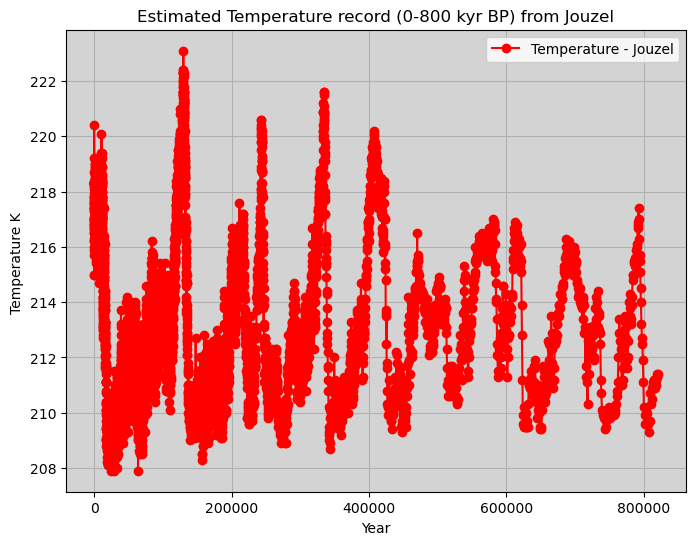

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df_temp1['EDC3béta'], df_temp1['temp'], color='red', label='Temperature - Jouzel', marker = 'o')
#plt.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='Luthi et al.', marker = 'o')
#plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='House Prices (from price index)',marker = 'o')
plt.xlabel('Year')
plt.ylabel('Temperature K ')
plt.title('Estimated Temperature record (0-800 kyr BP) from Jouzel')
plt.legend(loc="upper right")
plt.grid(True)
plt.gca().set_facecolor('lightgray')

PLot Jouzel temperature data against the composite data from Luthi et al. 
- Note: i've also inverted the x-axis as i find it counter intuitive to have past time going to the right..

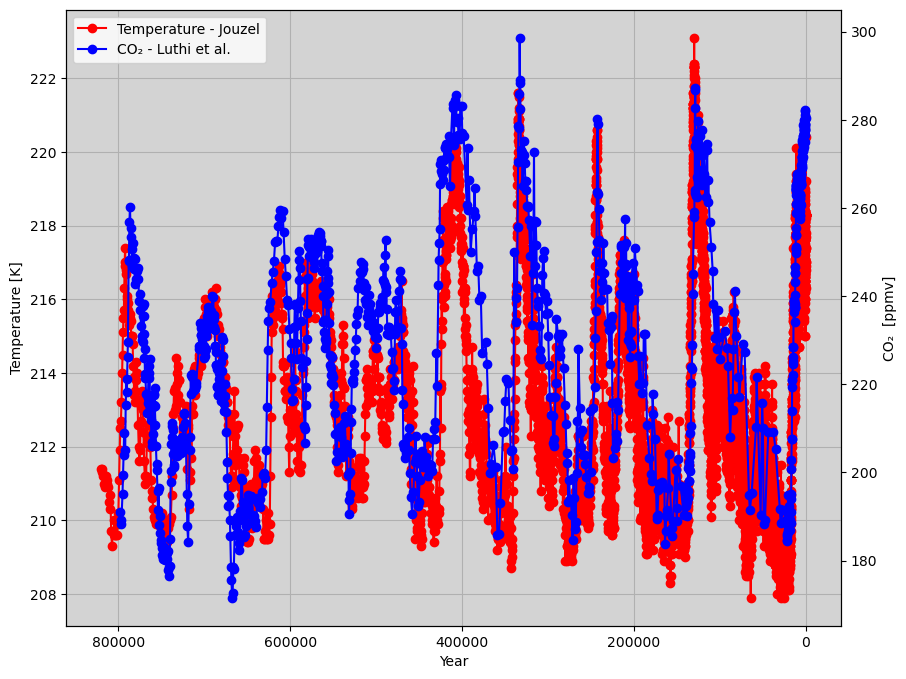

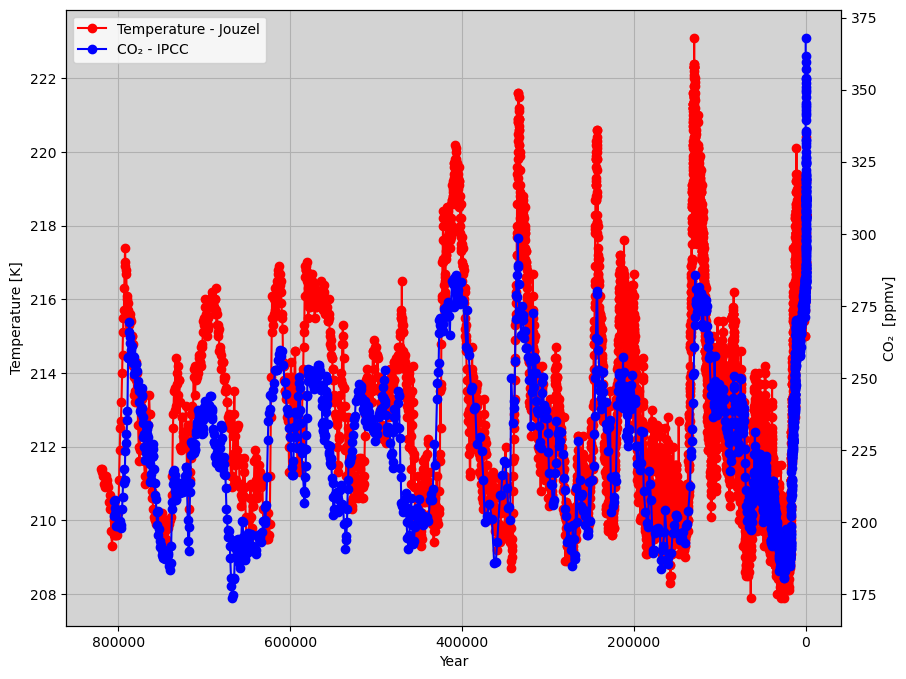

In [15]:
#all labels on one legend:  https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
# arguement for fig.add_subplot: https://stackoverflow.com/questions/3584805/what-does-the-argument-mean-in-fig-add-subplot111
# invert x-axis: https://www.delftstack.com/howto/matplotlib/how-to-revert-axes-in-matplotlib/#:~:text=To%20revert%20X-axis%2C%20we%20use%20matplotlib.axes.Axes.invert_xaxis,and%20to%20invert%20Y-axis%20we%20use%20matplotlib.axes.Axes.invert_yaxis.

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp1['EDC3béta'], df_temp1['temp'], color='red', label='Temperature - Jouzel', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [K]')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='CO\u2082 - Luthi et al.', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')
ax2.set_xlabel('EDC3_gas_a [yr]')
ax2.set_ylabel('CO\u2082  [ppmv]')
ax.grid(True) 
ax.set_facecolor('lightgray')
ax.invert_xaxis()
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp1['EDC3béta'], df_temp1['temp'], color='red', label='Temperature - Jouzel', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [K]')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], color='blue', label='CO\u2082 - IPCC', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')
ax2.set_xlabel('EDC3_gas_a [yr]')
ax2.set_ylabel('CO\u2082  [ppmv]')
ax.grid(True) 
ax.set_facecolor('lightgray')
ax.invert_xaxis()
plt.show()

Temperature Data from NOAA 

filename edc3deuttemp2007.txt - changed to NOAA.csv 

this is the same data as reported by Jouzel et al. however the temperature estimates have been updated.. 
 


text file header..

EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimates
-----------------------------------------------------------------------
               World Data Center for Paleoclimatology, Boulder
                                  and
                     NOAA Paleoclimatology Program
-----------------------------------------------------------------------
NOTE: PLEASE CITE CONTRIBUTORS WHEN USING THIS DATA!!!!!


NAME OF DATA SET: 
EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimates

LAST UPDATE: 11/26/2007 (Replaced age model. This file now includes EDC3 
age model.  Previous version of this file dated 10/16/2007 erroneously 
included the older EDC1-EDC2 age model)

CONTRIBUTOR: Valérie Masson-Delmotte, LSCE/IPSL 
IGBP PAGES/WDCA CONTRIBUTION SERIES NUMBER: 2007-091

SUGGESTED DATA CITATION: Jouzel, J., et al.  2007.
EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimates. 
IGBP PAGES/World Data Center for Paleoclimatology 
Data Contribution Series # 2007-091.
NOAA/NCDC Paleoclimatology Program, Boulder CO, USA.


ORIGINAL REFERENCE:
Jouzel, J., V. Masson-Delmotte, O. Cattani, G. Dreyfus, S. Falourd, 
G. Hoffmann, B. Minster, J. Nouet, J.M. Barnola, J. Chappellaz, H. Fischer,
J.C. Gallet, S. Johnsen, M. Leuenberger, L. Loulergue, D. Luethi, H. Oerter,
F. Parrenin, G. Raisbeck, D. Raynaud, A. Schilt, J. Schwander, E. Selmo, 
R. Souchez, R. Spahni, B. Stauffer, J.P. Steffensen, B. Stenni, T.F. Stocker, 
J.L. Tison, M. Werner, and E.W. Wolff.  2007.
Orbital and Millennial Antarctic Climate Variability over the Past 800,000 Years.
Science, Vol. 317, No. 5839, pp.793-797, 10 August 2007.

ABSTRACT:
A high-resolution deuterium profile is now available along the entire 
European Project for Ice Coring in Antarctica Dome C ice core, extending 
this climate record back to marine isotope stage 20.2, ~800,000 years ago. 
Experiments performed with an atmospheric general circulation model 
including water isotopes support its temperature interpretation. 
We assessed the general correspondence between Dansgaard-Oeschger 
events and their smoothed Antarctic counterparts for this Dome C record, 
which reveals the presence of such features with similar amplitudes 
during previous glacial periods. We suggest that the interplay between 
obliquity and precession accounts for the variable intensity of 
interglacial periods in ice core records.


GEOGRAPHIC REGION: Antarctica
PERIOD OF RECORD:  803 KYrBP - present

FUNDING SOURCES: 
EPICA is funded by the EU and by national contributions from Belgium, 
Denmark, France, Germany, Italy, The Netherlands, Norway, Sweden, 
Switzerland, and the UK.  This work has in particular benefited from 
the support of EPICA-MIS of the European 6th framework and Agence 
Nationale de la Recherche (ANR), Integration des Constraintes
Paléoclimatiques pour Réduire les Incertitudes sur l’Evolution du 
Clìmat pendant les Périodes Chaudes (PICC). The main logistic support 
was provided by Institut Polaire Français Paul-Emile Victor and
Programma Nazionale Ricerche in Antartide (at Dome C)and 
Alfred Wegener Institute (at Dronning Maud Land).


DESCRIPTION:  
High-resolution (55cm.) deuterium (dDice) profile from the EPICA Dome C Ice Core, 
Antarctica (75º 06' S, 123º 21' E), with an optimal accuracy of ± 0.5 ‰ (1 sigma), 
from the surface down to 3259.7 m.




DATA:
EPICA Dome C bag deuterium data 
(LSCE, analytical accuracy of 0.5 per mille)

Temperature estimated after correction for sea-water 
isotopic composition (Bintanja et al, 2005)
and for ice sheet elevation (Parrenin et al, 2007) 
on EDC3 age scale (Parrenin et al, 2007)


Column 1: Bag number (55 cm sample)
Column 2: Top depth (m)
Column 3: EDC3 age scale (years before year 1950)
Column 4: dD data (per mille with respect to SMOW)
Column 5: Temperature estimate (temperature difference from the average of the last 1000 years)

In [16]:
relative_path4 = "data\\project2\\NOAA.csv"
file_path4 = os.path.join(current_directory, relative_path4)
df_temp2 = pd.read_csv(file_path4)
df_temp2.head(30)
df_temp2.isnull().sum()

Bag            4801
ztop              0
Age               0
Deuterium        12
Temperature      15
dtype: int64

In [17]:
df_temp2.describe()

,Bag,ztop,Age,Deuterium,Temperature
count,999.000000,5800.000000,5800.000000,5788.000000,5785.000000
mean,500.000000,1594.725000,190016.390617,-417.579610,-4.580228
std,288.530761,920.953062,192546.207239,20.359332,3.446971
min,1.000000,0.000000,-50.000000,-449.500000,-10.580000
25%,250.500000,797.362500,46330.569350,-432.500000,-7.450000
50%,500.000000,1594.725000,121793.340000,-421.300000,-5.200000
75%,749.500000,2392.087500,272456.740000,-403.200000,-1.820000
max,999.000000,3189.450000,801662.000000,0.950000,5.460000


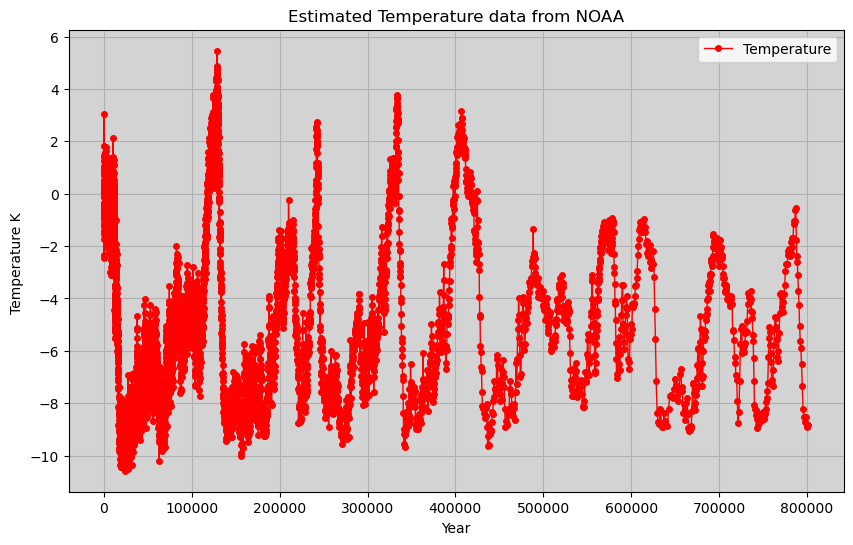

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(df_temp2['Age'], df_temp2['Temperature'], color='red', label='Temperature', marker = 'o', markersize=4, linewidth=1,)
plt.xlabel('Year')
plt.gca().set_facecolor('lightgray')
plt.ylabel('Temperature K ')
plt.title('Estimated Temperature data from NOAA')
plt.legend(loc="upper right")
plt.grid(2)

Compare the updated temperature from NOAA with the CO2 data from IPCC

- these are the two data sets for Temperature and CO2 we will be using going forward. 

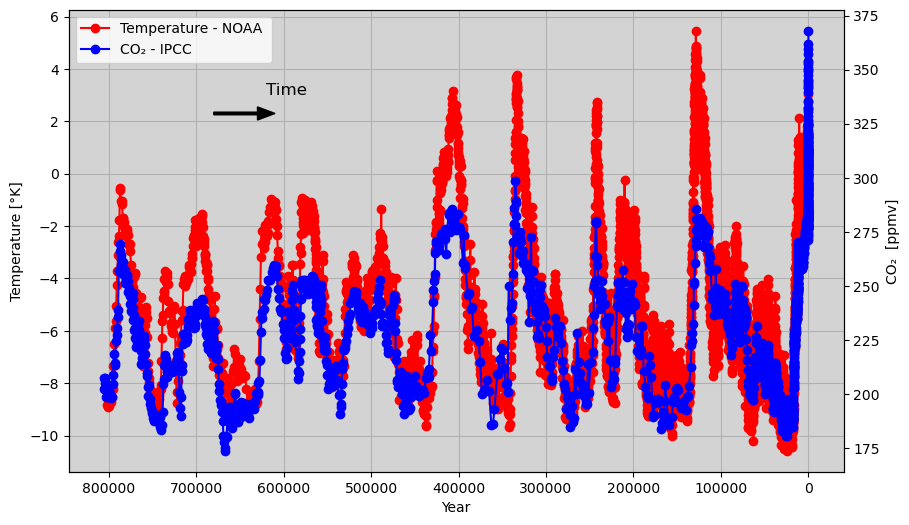

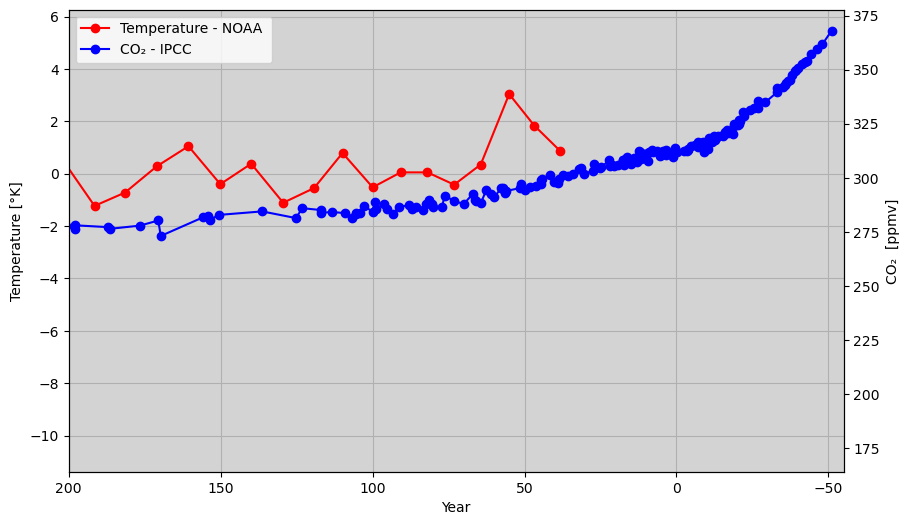

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp2['Age'], df_temp2['Temperature'], color='red', label='Temperature - NOAA ', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [\u00B0K]')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], color='blue', label='CO\u2082 - IPCC', marker = 'o')
#plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='CO\u2082 - Luthi et al.', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')
ax.set_facecolor('lightgray')
ax2.set_xlabel('EDC3_gas_a [year]')
ax2.set_ylabel('CO\u2082  [ppmv]')
ax.grid(True) 
ax.annotate('Time ', xy=(620000,3), fontsize=12,)
ax.arrow(680000, 2.3, -50000, 0, color = 'black', width = 0.1, head_length = 20000, head_width = 0.5)
ax.invert_xaxis()
plt.show()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp2['Age'], df_temp2['Temperature'], color='red', label='Temperature - NOAA ', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [\u00B0K]')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], color='blue', label='CO\u2082 - IPCC', marker = 'o')
#plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='CO\u2082 - Luthi et al.', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')
ax.set_facecolor('lightgray')
ax2.set_xlabel('EDC3_gas_a [year]')
ax2.set_ylabel('CO\u2082  [ppmv]')
ax.grid(True) 

ax.set_xlim(-55, 200)
ax.invert_xaxis()
plt.show()


## Methane (CH4) data set 

Data on the changes in atmospheric CH4 over the past 800,000 years was presented by Loulergue et al. [1] in Nature 

The file contains Supplementary Table can be found here: https://www.nature.com/articles/nature06950#MOESM32.

This file provides the CH4 data of the last 800,000 years from the EPICA Dome C ice core. The CH4 concentrations are listed against depth and the corresponding EDC3_gas_a age. (XLS 270 kb)




[1] Loulergue, L., Schilt, A., Spahni, R. et al. Orbital and millennial-scale features of atmospheric CH4 over the past 800,000 years. Nature 453, 383–386 (2008). https://doi.org/10.1038/nature06950



Import data set from excel spreadsheet: 41586_2008_BFnature06950_MOESM33_ESM.xls

In [20]:
# file header 
#Part of the EDC96 data is published in Monnin et al., 2001, Flückiger et al., 2002 and Spahni et al., 2003, Spahni et al. 2005
#and EDC99 data in Spahni et al. 2005
#All the new data are published in Loulergue et al., Nature, 2008
#The EDC3_gas_a age scale is detailed in Loulergue et al., 2007 (Climate of the Past) and is available on NOAA-NCDC database with ice chronology (Parrenin et al., 2007)
#Mean value are given for all the samples with <5cm of depth differences
#*******************************************************************************************
#All data (Grenoble and Bern, Grenoble data are corrected by +6 ppbv, to be coherent with the Bern dataset):
relative_path5 = "data\\project2\\41586_2008_BFnature06950_MOESM33_ESM.xls"
file_path5 = os.path.join(current_directory, relative_path5)
df_CH4 = pd.read_excel(file_path5, sheet_name="CH4_EDC", header = 18)
df_CH4.head(1)
df_CH4.tail(1)
#df_CH4.describe()

,EDC1999 depth [m],gas age (edc3_gas_a) [yrs BP 1950],CH4 mean [ppbv],1 s uncertainty [ppbv],"Bern, Grenoble [b, g]"
2102,3190.525,799396.1,399.3,10.0,g


Plot Methane data 

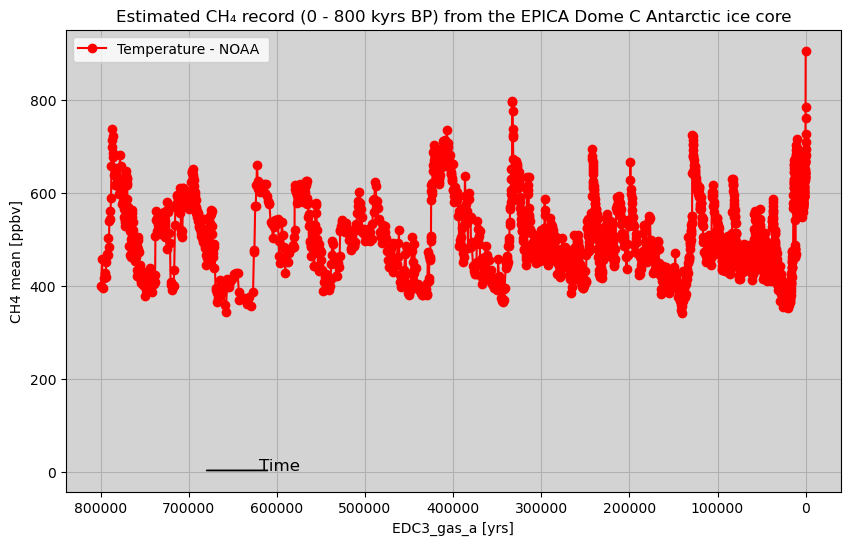

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_CH4['gas age (edc3_gas_a) [yrs BP 1950]'], df_CH4['CH4 mean [ppbv]'], color='red', label='CH4 mean [ppbv]', marker = 'o')
ax.set_xlabel('EDC3_gas_a [yrs]')
ax.set_ylabel('CH4 mean [ppbv]')
#
ax.legend(lns1, labs, loc='upper left')
ax.set_facecolor('lightgray')
ax.grid(True) 
ax.annotate('Time ', xy=(620000,3), fontsize=12,)
ax.arrow(680000, 2.3, -50000, 0, color = 'black', width = 0.1, head_length = 20000, head_width = 0.5)
ax.invert_xaxis()
ax.set_title('Estimated CH\u2084 record (0 - 800 kyrs BP) from the EPICA Dome C Antarctic ice core')
plt.show()


Now we have 3 data sets for CO2, CH4 and temperature which extends back 800,000 years. The next step is to determine the time period and sampling interval for them.. and get the data into one dataframe. 

The sampling interval for the 3 data sets is very different. I guess its not possible to measure the CO2, CH4 composition and the estimate temperature on the same sample? that would be more useful. 

- the temperature dataset from NOAA - ``df_temp2`` has 5800 time stamped data points with time extending from (-50) to 801662 BP (1950)  

- the CO2 data from the IPCC - ``df_IPCC`` has 1901 time points from - 50.03 to 805668.868405 BP (1950)

- the CH4 data has - ``df_CH4`` has 2103 time points from 13.4 to 799396.1  BP (1950)

the start and end points of the 3 data sets are different and the sampling interval is really inconsistent with time intervals ranging from a few hundred to several thousand years.

Need to interpolate the data and resample with a fixed interval. Then trunate the data set to align the start and end points. 

start point - the CH4 defines the data start point. Lets simply set it to 800,000 year BP (1950)
End point - again CH4 defines the data end point. Let's set it as 0 years BP (1950), therefore 1935. 

and sample every 100 years? 50 years ? 

Will need to splice with some morndern data sets as well.  

In [30]:
# create a new column that contains DeltaT for each data set. 
df_temp2['delta'] = df_temp2['Age'].diff()
df_IPCC['delta'] =df_IPCC['Gasage (yr BP)'].diff()
df_CH4['delta'] =df_CH4['gas age (edc3_gas_a) [yrs BP 1950]'].diff()

Plot up the deltaT column as a histogram 

(0.0, 2000.0)

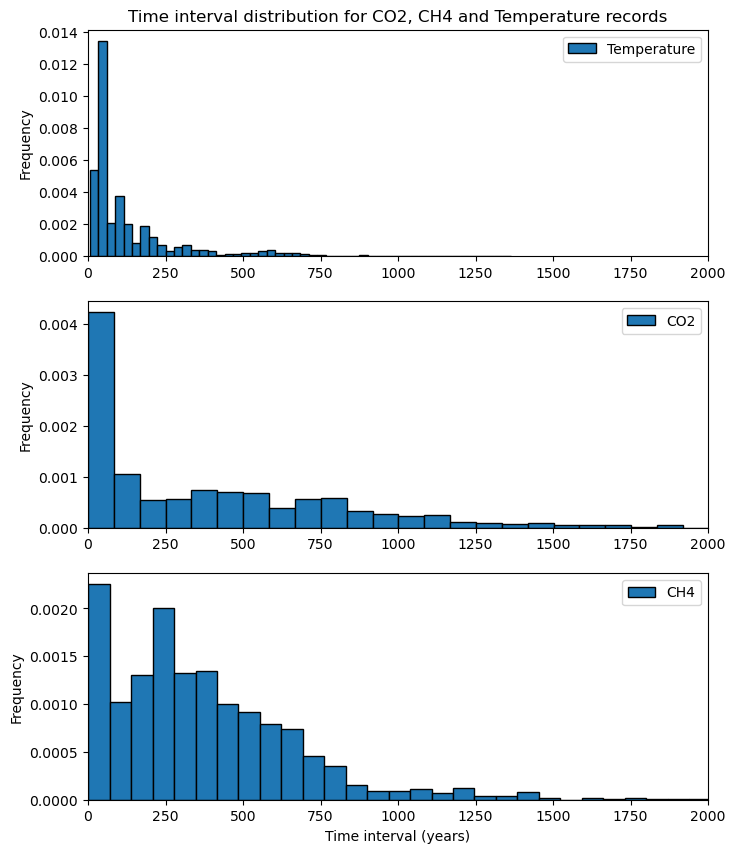

In [104]:
fig, ax = plt.subplots(3, 1, figsize=(8, 10))
ax[0].hist(df_temp2['delta'], bins = 50,  density=True, label='Temperature', edgecolor='black')
ax[0].set_title('Time interval distribution for CO2, CH4 and Temperature records')
ax[0].legend(loc='upper right')
#ax[0].set_xlabel('Bill length [mm]')
ax[0].set_ylabel('Frequency')
ax[0].set_xlim(0,2000)

ax[1].hist(df_IPCC['delta'], bins = 50, density=True, label='CO2', edgecolor='black')
#ax[1].set_title('Bill length distribution (in mm) for Penguin species')
ax[1].legend(loc='upper right')
#ax[1].set_xlabel('Bill length [mm]')
ax[1].set_ylabel('Frequency')
ax[1].set_xlim(0,2000)

ax[2].hist(df_CH4['delta'], bins = 50,  density=True, label='CH4', edgecolor='black')
#ax[2].set_title('Bill length distribution (in mm) for Penguin species')
ax[2].legend(loc='upper right')
ax[2].set_xlabel('Time interval (years)')
ax[2].set_ylabel('Frequency')
ax[2].set_xlim(0,2000)

The sample time interval varies quite a bit between in each data set and between dataset. 

therefore to harmonise the data, we need to interpolate then resmaple to a fixed time interval with the same start and end points. 






In interpolation methods, 'polynomial' generally means that you generate a polynomial with the same number of coefficients as you have data points. So, for 10 data points you would get an order 9 polynomial.

'cubic' generally means piecewise 3rd order polynomials. A sliding window of 4 data points is used to generate these cubic polynomials.


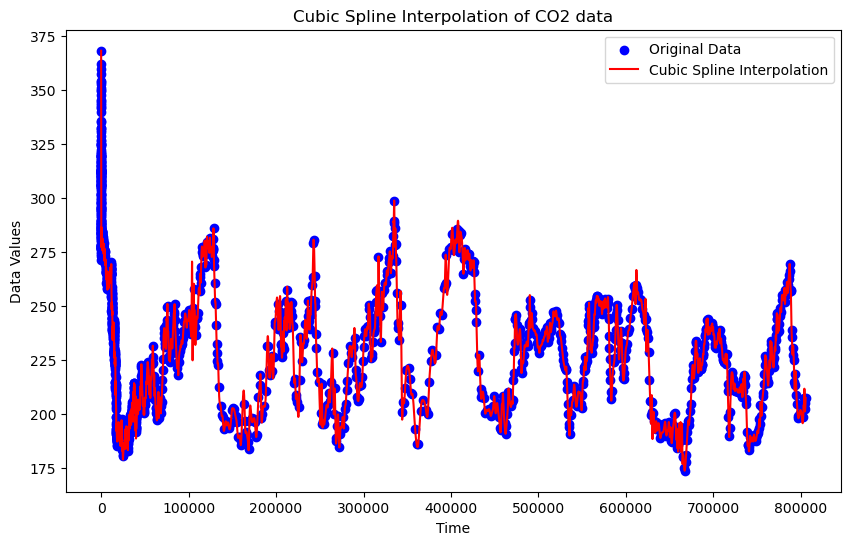

In [105]:

# cubic or polynominal interpolation: https://stackoverflow.com/questions/57796327/pandas-interpolation-method-cubic-spline-or-polynomial?rq=3
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline


# cubic spline interpolation on the 
spline_IPCC = CubicSpline(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)']) 

# Generate points for the interpolated curve - time 
inter_points = np.linspace(min(df_IPCC['Gasage (yr BP)']), max(df_IPCC['Gasage (yr BP)']), 8000)
inter_IPCC = spline_IPCC(inter_points)

# new time range for data 
new_time = np.arange(0, 800000 + 100, 100)
resampled_values = np.interp(new_time, inter_points, inter_IPCC)

# Create a new DataFrame to store the resampled data
resampled_df_IPCC = pd.DataFrame({'Time': new_time, 'CO2': resampled_values})

# Plot the original data and the interpolated curve
plt.figure(figsize=(10, 6))
plt.scatter(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], label='Original Data', color='blue')
plt.plot(inter_points, inter_IPCC, label='Cubic Spline Interpolation', color='red')
plt.title('Cubic Spline Interpolation of CO2 data')
plt.xlabel('Time')
plt.ylabel('Data Values')
plt.legend()
plt.show()

In [75]:
resampled_df_IPCC

,Time,CO2
0,0,330.502197
1,100,288.681895
2,200,284.843133
3,300,281.803361
4,400,279.705751
...,...,...
7996,799600,201.691385
7997,799700,201.703295
7998,799800,201.690889
7999,799900,201.653916


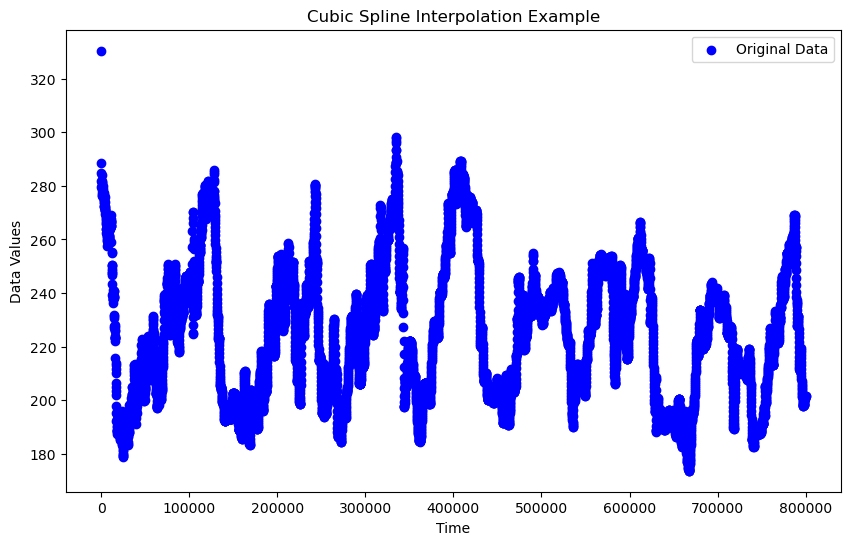

In [76]:
# Plot the original data and the interpolated curve
plt.figure(figsize=(10, 6))
plt.scatter(resampled_df_IPCC['Time'], resampled_df_IPCC['CO2'], label='Original Data', color='blue')
#plt.plot(inter_points, inter_IPCC, label='Cubic Spline Interpolation', color='red')
plt.title('Cubic Spline Interpolation Example')
plt.xlabel('Time')
plt.ylabel('Data Values')
plt.legend()
plt.show()

In [86]:
df_temp2['Age']
df_temp2['Temperature']

df_temp2_cleaned = df_temp2.dropna(subset=['Temperature'])
df_temp2_cleaned

,Bag,ztop,Age,Deuterium,Temperature,delta
12,13.0,6.60,38.37379,-390.90,0.88,7.76566
13,14.0,7.15,46.81203,-385.10,1.84,8.43824
14,15.0,7.70,55.05624,-377.80,3.04,8.24421
15,16.0,8.25,64.41511,-394.10,0.35,9.35887
16,17.0,8.80,73.15077,-398.70,-0.42,8.73566
...,...,...,...,...,...,...
5795,NaN,3187.25,797408.00000,-440.20,-8.73,959.00000
5796,NaN,3187.80,798443.00000,-439.00,-8.54,1035.00000
5797,NaN,3188.35,799501.00000,-441.10,-8.88,1058.00000
5798,NaN,3188.90,800589.00000,-441.42,-8.92,1088.00000


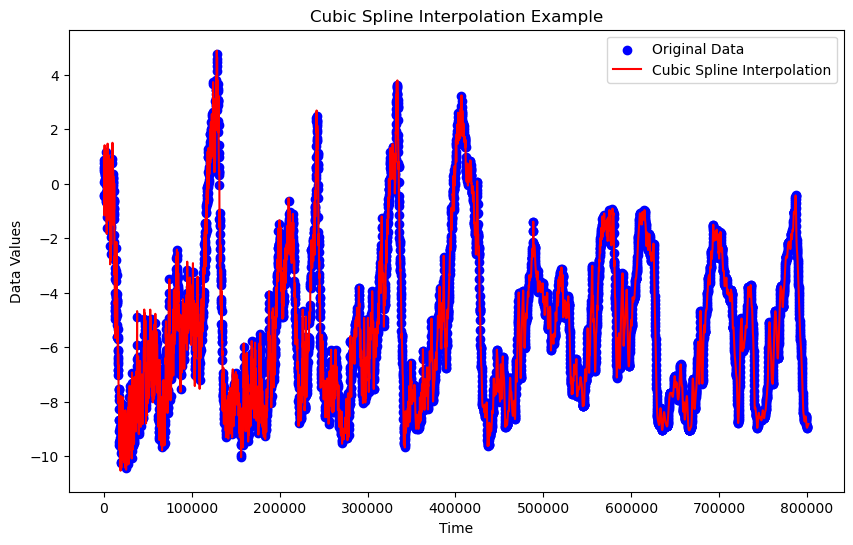

In [87]:

# cubic or polynominal interpolation: https://stackoverflow.com/questions/57796327/pandas-interpolation-method-cubic-spline-or-polynomial?rq=3
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline


# cubic spline interpolation on the 
spline_NOAA = CubicSpline(df_temp2_cleaned['Age'], df_temp2_cleaned['Temperature']) 

# Generate points for the interpolated curve - time 
inter_points = np.linspace(min(df_temp2_cleaned['Age']), max(df_temp2_cleaned['Age']), 8000)
inter_NOAA = spline_NOAA(inter_points)

# new time range for data 
new_time = np.arange(0, 800000 + 100, 100)
resampled_values = np.interp(new_time, inter_points, inter_NOAA)

# Create a new DataFrame to store the resampled data
resampled_df_temp = pd.DataFrame({'Time': new_time, 'Temp': resampled_values})

# Plot the original data and the interpolated curve
plt.figure(figsize=(10, 6))
plt.scatter(resampled_df_temp['Time'], resampled_df_temp['Temp'], label='Original Data', color='blue')
plt.plot(inter_points, inter_NOAA, label='Cubic Spline Interpolation', color='red')
plt.title('Cubic Spline Interpolation Example')
plt.xlabel('Time')
plt.ylabel('Data Values')
plt.legend()
plt.show()


In [88]:
resampled_df_temp

,Time,Temp
0,0,0.880000
1,100,0.532010
2,200,0.609043
3,300,0.049773
4,400,-0.414306
...,...,...
7996,799600,-8.905143
7997,799700,-8.925387
7998,799800,-8.940134
7999,799900,-8.949870


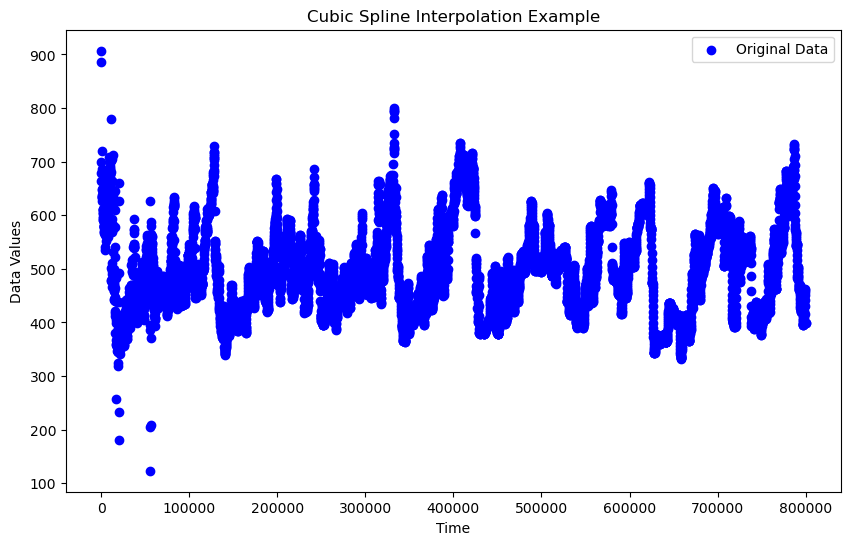

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# cubic or polynominal interpolation: https://stackoverflow.com/questions/57796327/pandas-interpolation-method-cubic-spline-or-polynomial?rq=3
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html


# cubic spline interpolation on the CH4 data 
spline_CH4 = CubicSpline(df_CH4['gas age (edc3_gas_a) [yrs BP 1950]'], df_CH4['CH4 mean [ppbv]']) 

# Generate points for the interpolated curve - time 
inter_points = np.linspace(min(df_CH4['gas age (edc3_gas_a) [yrs BP 1950]']), max(df_CH4['gas age (edc3_gas_a) [yrs BP 1950]']), 8000)
inter_CH4 = spline_CH4(inter_points)

# new time range for data 
new_time = np.arange(0, 800000 + 100, 100)
resampled_values = np.interp(new_time, inter_points, inter_CH4)

# Create a new DataFrame to store the resampled data
resampled_df_CH4 = pd.DataFrame({'Time': new_time, 'CH4': resampled_values})

# Plot the original data and the interpolated curve
plt.figure(figsize=(10, 6))
plt.scatter(resampled_df_CH4['Time'], resampled_df_CH4['CH4'], label='Original Data', color='blue')
#plt.plot(inter_points, inter_N, label='Cubic Spline Interpolation', color='red')
plt.title('Cubic spline interpolation on the ')
plt.xlabel('Time')
plt.ylabel('CH4 (ppmv) Data Values')
plt.legend()
plt.show()


Let's merge these three 

In [101]:
#resampled_df_IPCC = pd.DataFrame({'Time': pd.date_range('2022-01-01', '2022-01-05'), 'Values_A': [1, 2, 3, 4, 5]})
#resampled_df_temp = pd.DataFrame({'Time': pd.date_range('2022-01-03', '2022-01-07'), 'Values_B': [10, 20, 30, 40, 50]})

# Merge based on the 'Time' column
merged_df = pd.merge(resampled_df_IPCC, resampled_df_temp,  on='Time', how='inner')
merged_df = pd.merge(merged_df, resampled_df_CH4,  on='Time', how='inner')

merged_df.set_index('Time', inplace=True)
merged_df

,CO2,Temp,CH4
Time,,,
0,330.502197,0.880000,907.000000
100,288.681895,0.532010,885.738147
200,284.843133,0.609043,699.643309
300,281.803361,0.049773,664.083072
400,279.705751,-0.414306,678.185507
...,...,...,...
799600,201.691385,-8.905143,399.300000
799700,201.703295,-8.925387,399.300000
799800,201.690889,-8.940134,399.300000


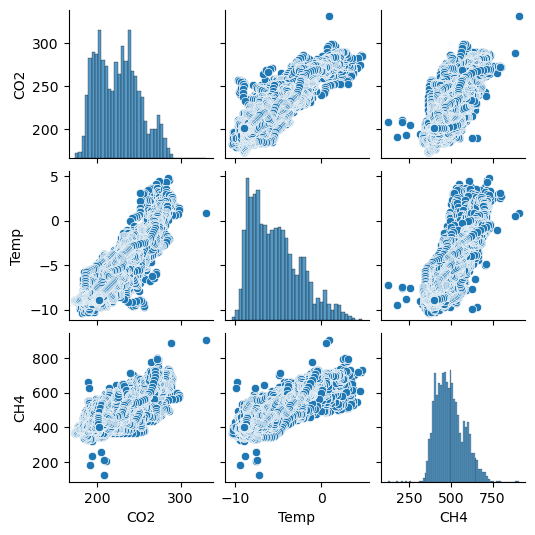

In [102]:
g = sns.pairplot(merged_df, height=1.8)

<Axes: >

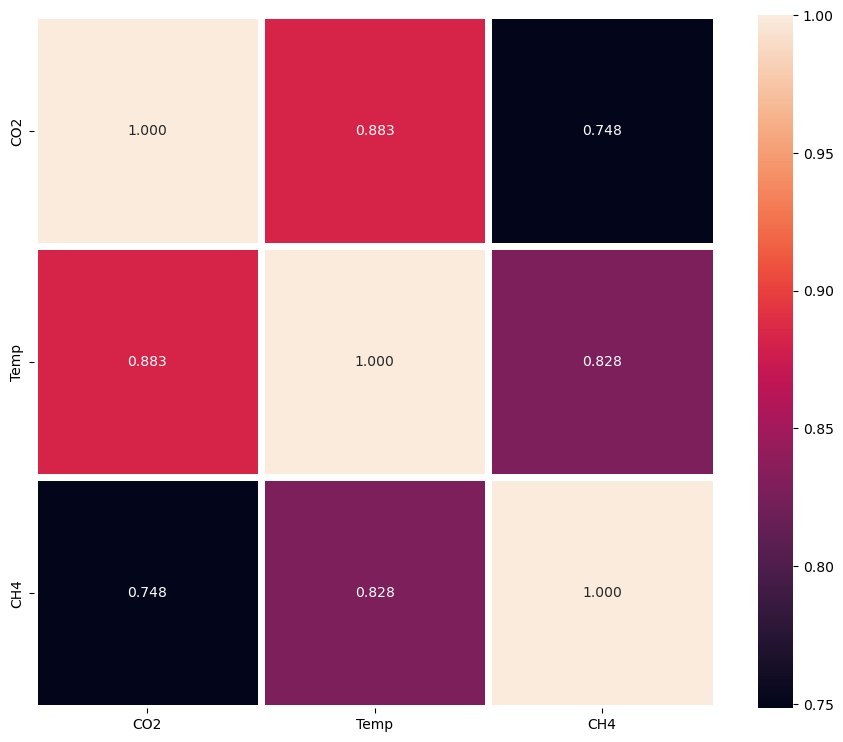

In [103]:
plt.figure(figsize=(11, 9))
sns.heatmap(merged_df.corr(), annot=True, linewidth=5,fmt='.3f')

Lets looks at the different periods a bit closer 

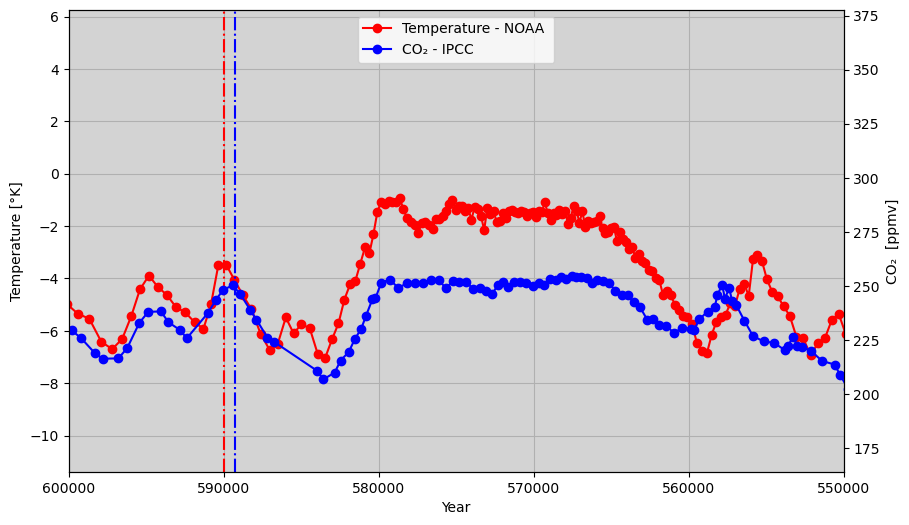

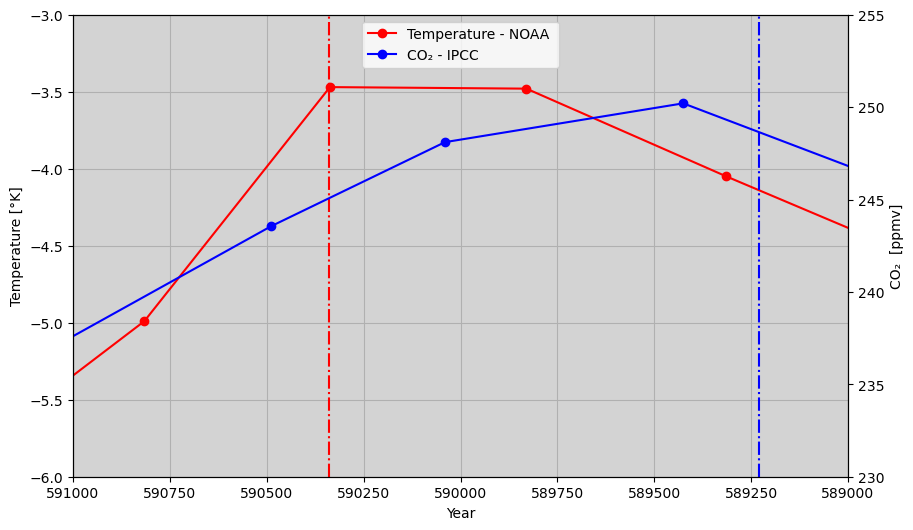

In [24]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp2['Age'], df_temp2['Temperature'], color='red', label='Temperature - NOAA ', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [\u00B0K]')
#ax1.tick_params(axis='y')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], color='blue', label='CO\u2082 - IPCC', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper center')
ax.set_facecolor('lightgray')
ax2.set_xlabel('EDC3_gas_a [year]')
ax2.set_ylabel('CO\u2082  [ppmv]')
ax.grid(True) 
ax.annotate('Time ', xy=(640000,3), fontsize=12,)
ax.arrow(660000, 2.3, -20000, 0, color = 'black', width = 0.1, head_length = 2000, head_width = 0.5)
ax.set_xlim(550000, 600000)
ax.axvline(x=590000, linestyle='-.', color='red', label='Vertical Line')
ax.axvline(x=589300, linestyle='-.', color='blue', label='Vertical Line')
ax.invert_xaxis()

plt.show()
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp2['Age'], df_temp2['Temperature'], color='red', label='Temperature - NOAA ', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [\u00B0K]')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], color='blue', label='CO\u2082 - IPCC', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper center')
ax.set_facecolor('lightgray')
ax2.set_xlabel('EDC3_gas_a [year]')
ax2.set_ylabel('CO\u2082  [ppmv]')
ax2.set_ylim(230, 255)
ax.grid(True) 
ax.annotate('Time ', xy=(640000,3), fontsize=12,)
ax.arrow(660000, 2.3, -20000, 0, color = 'black', width = 0.1, head_length = 2000, head_width = 0.5)
ax.set_xlim(589000, 591000)
ax.set_ylim(-6, -3)
ax.axvline(x=590340, linestyle='-.', color='red', label='Vertical Line')
ax.axvline(x=589230, linestyle='-.', color='blue', label='Vertical Line')
ax.invert_xaxis()
plt.show()

On first glance the data looks very compelling with temperature tracking with the CO2 level. However I have noticed some inconsistencies/anomalies. That perhaps can be explained by some paleoclimate expert. 

If we assume that temperature should temporally lag CO2 levels, when we look at the period from 550 k - 600 k above, there seems to be a few inconsistencies. For instance, ~ 590000 BP the temperature stops increaesing despite increasing CO2 levels (red dashed line). The CO2 levels peak 700 years later (blue dashed line) and at this point the tempera 

(400000.0, -1000.0)

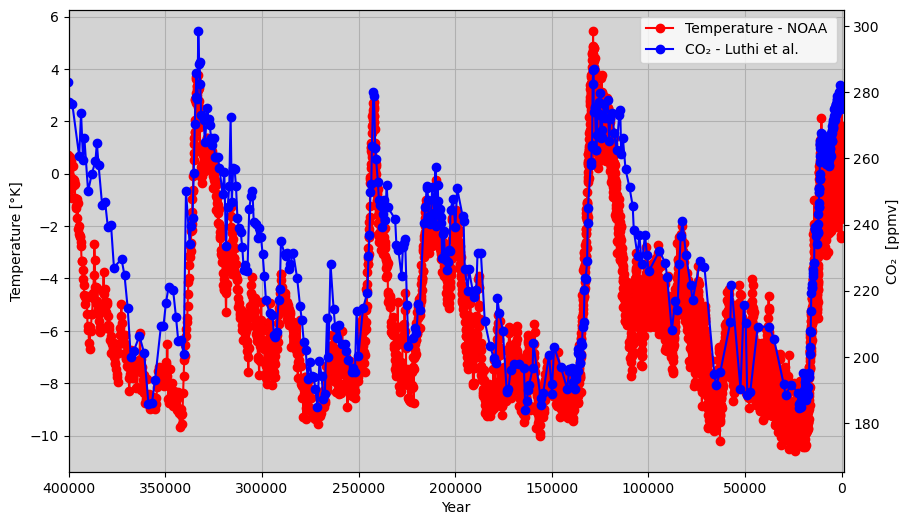

In [25]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp2['Age'], df_temp2['Temperature'], color='red', label='Temperature - NOAA ', marker = 'o')

ax.set_xlabel('Year')
ax.set_ylabel('Temperature [\u00B0K]')
#ax1.tick_params(axis='y')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='CO\u2082 - Luthi et al.', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper right')
ax.set_facecolor('lightgray')
ax2.set_xlabel('EDC3_gas_a [year]')
ax2.set_ylabel('CO\u2082  [ppmv]')
ax.grid(True) 
#arrow_properties = dict(facecolor='black', edgecolor='black', arrowstyle='->', shrinkA=0, shrinkB=0)
ax.annotate('Time ', xy=(640000,3), fontsize=12,)
ax.arrow(660000, 2.3, -20000, 0, color = 'black', width = 0.1, head_length = 2000, head_width = 0.5)
ax.set_xlim(-1000, 400000)
ax.set_xlim(ax.get_xlim()[::-1])


In [26]:
df_COM['EDC3_gas_a (yr)']

0          137
1          268
2          279
3          395
4          404
         ...  
1091    794608
1092    795202
1093    796467
1094    797099
1095    798512
Name: EDC3_gas_a (yr), Length: 1096, dtype: int64

KeyError: 'delta'

In [ ]:


# add trend lines to the data sets..


coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

NameError: name 'x' is not defined

In [ ]:
df_COM_interpolated = df_COM.reindex(df_temp2.index).interpolate(method='linear')
df_COM_interpolated


,EDC3_gas_a (yr),CO2 (ppmv),delta
0,137.0,280.4,NaN
1,268.0,274.9,131.0
2,279.0,277.9,11.0
3,395.0,279.1,116.0
4,404.0,281.9,9.0
...,...,...,...
5795,798512.0,191.0,1413.0
5796,798512.0,191.0,1413.0
5797,798512.0,191.0,1413.0
5798,798512.0,191.0,1413.0


(841743.1813105, -40042.807520500006)

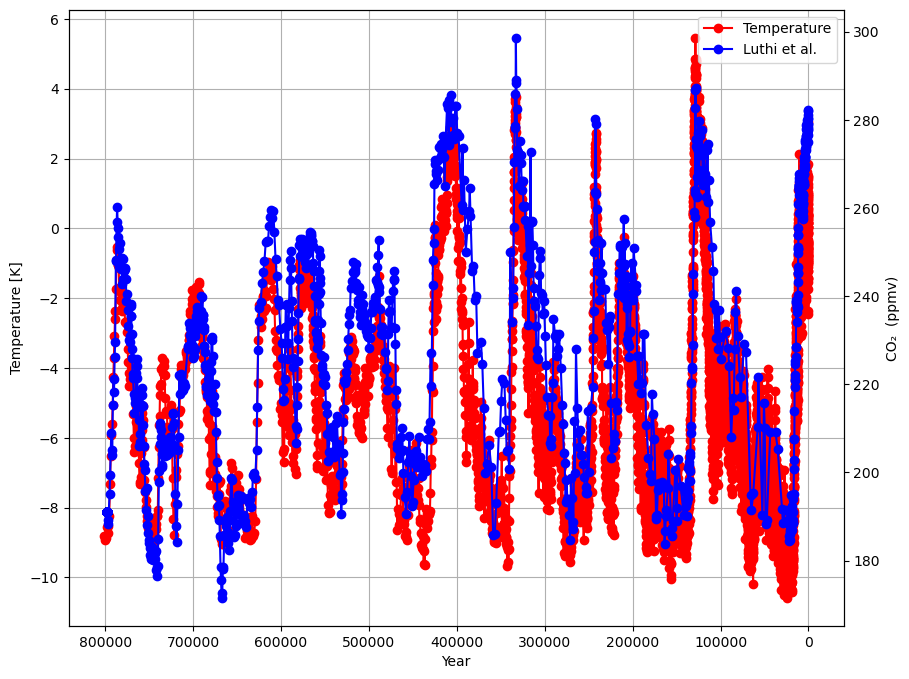

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp2['Age'], df_temp2['Temperature'], color='red', label='Temperature', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [K]')
#ax1.tick_params(axis='y')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_COM_interpolated['EDC3_gas_a (yr)'], df_COM_interpolated['CO2 (ppmv)'], color='blue', label='Luthi et al.', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper right')
ax2.set_xlabel('Year')
ax2.set_ylabel('CO\u2082  (ppmv)')
ax.grid(True) 
ax.set_xlim(ax.get_xlim()[::-1])


In [ ]:
# https://www.met.ie/climate/available-data/long-term-data-sets/